In [1]:
!pip install unidecode

In [2]:
!pip install numpy

In [3]:
!pip install mapclassify

In [37]:
!pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [146]:
!pip install --upgrade geopandas

In [147]:
!pip install --upgrade fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 3.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: fiona
    Found existing installation: Fiona 1.8.22
    Uninstalling Fiona-1.8.22:
      Successfully uninstalled Fiona-1.8.22


In [122]:
#EJERCICIO 1 

In [123]:
# Tabla de datos
import pandas as pd
import os

datadis=pd.read_excel(os.path.join('data','indicadores_Peru.xls'),dtype={'Ubigeo': object})
datadis.head() 

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,hogares_saneamiento_pct,poblacion_pobreza_PCT,viviendas_con_servicio_de_luz,ICP 2018
0,10202,Amazonas,Bagua,ARAMANGO,10940,"809,07",61.44,25.576,78.372,0.211920
1,10201,Amazonas,Bagua,BAGUA,26091,"150,99",89.46,36.784,24.750,0.149282
2,10302,Amazonas,Bongara,CHISQUILLA,335,"174,96",88.20,36.280,44.064,0.176648
3,10102,Amazonas,Chachapoyas,ASUNCION,288,"25,71",73.42,30.368,57.303,0.170804
4,10103,Amazonas,Chachapoyas,BALSAS,1644,"357,09",89.80,36.920,46.188,0.239790


In [124]:
#Mapa
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

dataDisMap = gpd.read_file(os.path.join("maps","DistritosMap","DISTRITOS1874.shp"))
dataDisMap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."


In [125]:
#PreProcessing 

In [126]:
#str.upper: función que transforma el contenido de las columnas en mayúsculas
#str.strip: función que elimina espacios en blanco al principio y al final de cada valor

capitalizeColumns=lambda x: x.str.upper().str.strip()

datadis[['Departamento','Provincia']]=datadis[['Departamento','Provincia']].apply(capitalizeColumns)
dataDisMap[['DEPARTAMEN','PROVINCIA']]=dataDisMap[['DEPARTAMEN','PROVINCIA']].apply(capitalizeColumns)

In [127]:
import unidecode
#unidecode.unidecode() elimina acentos y diacríticos 
byePunctuation=lambda x: unidecode.unidecode(x)

datadis[['Departamento','Provincia']]=datadis[['Departamento','Provincia']].applymap(byePunctuation)
dataDisMap[['DEPARTAMEN','PROVINCIA']]=dataDisMap[['DEPARTAMEN','PROVINCIA']].applymap(byePunctuation)

In [128]:
len(datadis.Provincia),len(dataDisMap.PROVINCIA)

(280, 1874)

In [129]:
# cuento duplicados en "Provincia" y "PROVINCIA" de los df
datadis.Provincia.duplicated().sum(), dataDisMap.PROVINCIA.duplicated().sum()

(114, 1678)

In [130]:
# concatenación de columnas 
datadis['DepartProv'] = ["+".join(pd) for pd in zip (datadis.Departamento, datadis.Provincia)]
dataDisMap['DepartProv'] = ["+".join(pd) for pd in zip (dataDisMap.DEPARTAMEN, dataDisMap.PROVINCIA)]

In [131]:
datadis['DepartProv'].head()

0          AMAZONAS+BAGUA
1          AMAZONAS+BAGUA
2        AMAZONAS+BONGARA
3    AMAZONAS+CHACHAPOYAS
4    AMAZONAS+CHACHAPOYAS
Name: DepartProv, dtype: object

In [132]:
# reemplazos guiones y espacios múltiples por espacio simple
datadis.DepartProv = datadis.DepartProv.str.replace("\-|\_|\s+"," ",regex=True)
dataDisMap.DepartProv = dataDisMap.DepartProv.str.replace("\-|\_|\s+"," ",regex=True)

In [133]:
datadis

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,hogares_saneamiento_pct,poblacion_pobreza_PCT,viviendas_con_servicio_de_luz,ICP 2018,DepartProv
0,10202,AMAZONAS,BAGUA,ARAMANGO,10940,"809,07",61.44,25.576,78.372,0.211920,AMAZONAS+BAGUA
1,10201,AMAZONAS,BAGUA,BAGUA,26091,"150,99",89.46,36.784,24.750,0.149282,AMAZONAS+BAGUA
2,10302,AMAZONAS,BONGARA,CHISQUILLA,335,"174,96",88.20,36.280,44.064,0.176648,AMAZONAS+BONGARA
3,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,288,"25,71",73.42,30.368,57.303,0.170804,AMAZONAS+CHACHAPOYAS
4,10103,AMAZONAS,CHACHAPOYAS,BALSAS,1644,"357,09",89.80,36.920,46.188,0.239790,AMAZONAS+CHACHAPOYAS
...,...,...,...,...,...,...,...,...,...,...,...
275,240302,TUMBES,ZARUMILLA,AGUAS VERDES,24781,"46,06",80.35,33.140,43.488,0.320826,TUMBES+ZARUMILLA
276,250204,UCAYALI,ATALAYA,YURUA,2716,"9175,58",69.40,28.760,40.824,0.171016,UCAYALI+ATALAYA
277,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,159364,"10485,41",92.23,37.892,51.606,0.144030,UCAYALI+CORONEL PORTILLO
278,250301,UCAYALI,PADRE ABAD,PADRE ABAD,26614,"4689,2",59.06,24.624,86.445,0.250060,UCAYALI+PADRE ABAD


In [134]:
# Merging: combinar las dos tablas
nomatch_df = set(datadis.DepartProv)-set(dataDisMap.DepartProv)
nomatch_gdf = set(dataDisMap.DepartProv)-set(datadis.DepartProv)

In [135]:
len(nomatch_df), len(nomatch_gdf)

(3, 33)

In [136]:
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('HUANUCO+MARA+ ON', ('HUANUCO+MARANON', 90)),
 ('LAMBAYEQUE+FERRE+ AFE', ('LAMBAYEQUE+FERRENAFE', 93)),
 ('LORETO+DATEM DEL MARA+ ON', ('LORETO+DATEM DEL MARANON', 94))]

In [137]:
changes_df = {dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

In [138]:
#reemplazo
datadis.DepartProv.replace(changes_df,inplace=True)

In [139]:
#merge 
dataDisMap = dataDisMap.merge(datadis, on='DepartProv')

In [140]:
#tabla "dataDisMap" ya mergeada 
dataDisMap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3309 entries, 0 to 3308
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   DEPARTAMEN                     3309 non-null   object  
 1   PROVINCIA                      3309 non-null   object  
 2   DISTRITO                       3309 non-null   object  
 3   INSTITUCIO                     3309 non-null   object  
 4   geometry                       3309 non-null   geometry
 5   DepartProv                     3309 non-null   object  
 6   Ubigeo                         3309 non-null   object  
 7   Departamento                   3309 non-null   object  
 8   Provincia                      3309 non-null   object  
 9   Distrito                       3309 non-null   object  
 10  Poblacion                      3309 non-null   int64   
 11  Superficie                     3309 non-null   object  
 12  hogares_saneamiento_pct   

In [141]:
#elimino columnas repetidas
bye = ['Departamento', 'Provincia', 'Distrito','INSTITUCIO']
dataDisMap.drop(columns=bye,inplace=True)

dataDisMap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,DepartProv,Ubigeo,Poblacion,Superficie,hogares_saneamiento_pct,poblacion_pobreza_PCT,viviendas_con_servicio_de_luz,ICP 2018
0,MOQUEGUA,ILO,ILO,"POLYGON ((-71.33934 -17.62215, -71.33907 -17.6...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645,0.150013
1,MOQUEGUA,ILO,EL ALGARROBAL,"POLYGON ((-71.25881 -17.44067, -71.25696 -17.4...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645,0.150013
2,MOQUEGUA,ILO,PACOCHA,"POLYGON ((-71.43784 -17.24969, -71.43806 -17.2...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645,0.150013
3,TACNA,TARATA,ESTIQUE PAMPA,"POLYGON ((-70.06805 -17.51975, -70.06760 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305,0.314996
4,TACNA,TARATA,ESTIQUE,"POLYGON ((-69.84819 -17.50783, -69.84942 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305,0.314996


In [142]:
rename = {'DEPARTAMEN': 'DEPARTAMENTO', 'hogares_saneamiento_pct':'HogSaneamPct', 'poblacion_pobreza_PCT':'PobPobrezaPct', 'viviendas_con_servicio_de_luz':'VivConLuzPct'}
dataDisMap.rename(columns=rename, inplace=True)

dataDisMap.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,geometry,DepartProv,Ubigeo,Poblacion,Superficie,HogSaneamPct,PobPobrezaPct,VivConLuzPct,ICP 2018
0,MOQUEGUA,ILO,ILO,"POLYGON ((-71.33934 -17.62215, -71.33907 -17.6...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645,0.150013
1,MOQUEGUA,ILO,EL ALGARROBAL,"POLYGON ((-71.25881 -17.44067, -71.25696 -17.4...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645,0.150013
2,MOQUEGUA,ILO,PACOCHA,"POLYGON ((-71.43784 -17.24969, -71.43806 -17.2...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645,0.150013
3,TACNA,TARATA,ESTIQUE PAMPA,"POLYGON ((-70.06805 -17.51975, -70.06760 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305,0.314996
4,TACNA,TARATA,ESTIQUE,"POLYGON ((-69.84819 -17.50783, -69.84942 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305,0.314996


In [149]:
#GUARDAR GPKG 
#dataDisMap.to_file(os.path.join('maps',"DistritosMapPeru.gpkg"), layer='provincias', driver="GPKG")

In [27]:
#EJERCICIO 2

In [32]:
# estadísticas de 'HogSaneamPct'
dataDisMap.HogSaneamPct.describe()

count    3309.000000
mean       80.668160
std        11.580376
min        52.530000
25%        72.820000
50%        81.950000
75%        91.260000
max        97.180000
Name: HogSaneamPct, dtype: float64

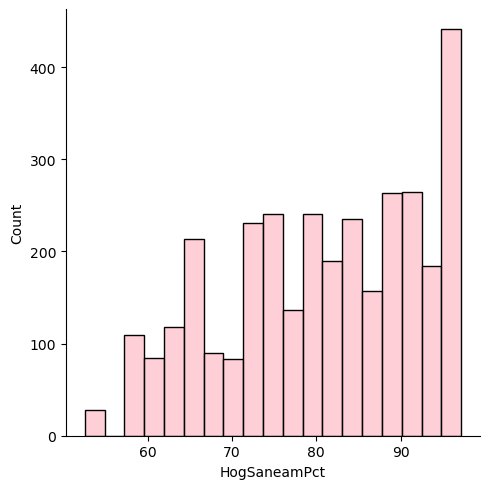

In [36]:
import seaborn as sea

sea.displot(dataDisMap.HogSaneamPct, color='pink')

In [37]:
sea.boxplot(dataDisMap.HogSaneamPct, color='pink', orient='h')

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HogSaneamPct'>

In [39]:
#aseguro que los resultados sean consistentes
import numpy as np
np.random.seed(12345)

In [41]:
import mapclassify 

In [42]:
K = 5

In [43]:
ei5 = mapclassify.EqualInterval(dataDisMap['HogSaneamPct'], k=K)

In [44]:
msd = mapclassify.StdMean(dataDisMap['HogSaneamPct'])

In [45]:
q5 = mapclassify.Quantiles(dataDisMap['HogSaneamPct'], k=K)

In [46]:
mb5 = mapclassify.MaximumBreaks(dataDisMap['HogSaneamPct'], k=K)

In [47]:
ht = mapclassify.HeadTailBreaks(dataDisMap['HogSaneamPct'])

In [48]:
fj5 = mapclassify.FisherJenks(dataDisMap['HogSaneamPct'], k=K)

In [49]:
jc5 = mapclassify.JenksCaspall(dataDisMap['HogSaneamPct'], k=K)

In [50]:
ht

HeadTailBreaks

   Interval      Count
----------------------
[52.53, 80.67] |  1575
(80.67, 90.10] |   845
(90.10, 94.32] |   404
(94.32, 95.89] |   333
(95.89, 97.04] |    81
(97.04, 97.18] |    71

In [51]:
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1575,  845,  404,  333,   81,   71]))

In [52]:
pd.Series(ht.yb).value_counts()

0    1575
1     845
2     404
3     333
4      81
5      71
dtype: int64

In [53]:
ht.bins

array([80.66815956, 90.10224337, 94.31934758, 95.88713402, 97.04026316,
       97.18      ])

In [54]:
HT_bins = list(ht.bins)
HT_bins.insert(0,dataDisMap.HogSaneamPct.min())

In [55]:
sea.displot(dataDisMap.HogSaneamPct, bins=HT_bins,color='blue')

In [57]:
class5 = q5, ei5, msd, ht, mb5, fj5, jc5

# recolecto ADCM para cada clasificador
fits = np.array([ c.adcm for c in class5])

# convertir puntuaciones de ADCM en un df
adcms = pd.DataFrame(fits)

# agrego nombres de clasificadores
adcms['classifier'] = [c.name for c in class5]

# agrego nombres de columna al ADCM
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(y='Classifier', x='ADCM', data=adcms, palette='Pastel1')

In [58]:
dataDisMap['QU'] = q5.yb
dataDisMap['EI'] = ei5.yb
dataDisMap['FJ'] = fj5.yb

In [59]:
class5new = q5, ei5, fj5
pd.DataFrame({c.name: c.counts for c in class5new}, index=['Class-{}'.format(i) for i in range(5)])

,Quantiles,EqualInterval,FisherJenks
Class-0,683,221,643
Class-1,651,466,691
Class-2,666,763,666
Class-3,684,758,684
Class-4,625,1101,625


In [63]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))

dataDisMap.plot(column='QU', 
                    cmap='viridis', 
                    categorical=True,
                    edgecolor='white', 
                    linewidth=0., 
                    alpha=0.75, 
                    legend=True,
                    legend_kwds=dict(loc=2),
                    ax=ax)

ax.set_axis_off()

dataDisMap.plot()

<AxesSubplot:>

In [65]:
#Quantiles (distribuir datos equitativamente en diferentes categorías)

f, ax = plt.subplots(1, figsize=(9, 9))

dataDisMap.plot(column='HogSaneamPct', 
                      cmap='viridis',       
                      scheme='Quantiles',
                      k=5, 
                      edgecolor='white', 
                      linewidth=0.2, 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax)

ax.set_axis_off()

In [66]:
#EqualInterval

f, ax = plt.subplots(1, figsize=(9, 9))

dataDisMap.plot(column='HogSaneamPct', 
                      cmap='viridis',       
                      scheme='EqualInterval',
                      k=5, 
                      edgecolor='white', 
                      linewidth=0.2, 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax)

ax.set_axis_off()

In [67]:
#FisherJenks (maximizar la diferenciación entre los grupos)

f, ax = plt.subplots(1, figsize=(9, 9))

dataDisMap.plot(column='HogSaneamPct', 
                      cmap='viridis',       
                      scheme='FisherJenks',
                      k=5, 
                      edgecolor='white', 
                      linewidth=0.2, 
                      alpha=0.75, 
                      legend=True,
                      legend_kwds=dict(loc=2),
                      ax=ax)

ax.set_axis_off()

In [70]:
#dataDisMap.to_file(os.path.join('maps',"dataMapasPeru.gpkg"), layer='provincias', driver="GPKG")

In [71]:
#EJERCICIO 3 

In [72]:
dataDisMap.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,geometry,DepartProv,Ubigeo,Poblacion,Superficie,HogSaneamPct,PobPobrezaPct,VivConLuzPct,QU,EI,FJ
0,MOQUEGUA,ILO,ILO,"POLYGON ((-71.33934 -17.62215, -71.33907 -17.6...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645,3,4,3
1,MOQUEGUA,ILO,EL ALGARROBAL,"POLYGON ((-71.25881 -17.44067, -71.25696 -17.4...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645,3,4,3
2,MOQUEGUA,ILO,PACOCHA,"POLYGON ((-71.43784 -17.24969, -71.43806 -17.2...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.420,75.645,3,4,3
3,TACNA,TARATA,ESTIQUE PAMPA,"POLYGON ((-70.06805 -17.51975, -70.06760 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305,4,4,4
4,TACNA,TARATA,ESTIQUE,"POLYGON ((-69.84819 -17.50783, -69.84942 -17.5...",TACNA+TARATA,230408,547,"347,06",93.46,38.384,55.305,4,4,4


In [46]:
# selecciono 3 variables numéricas del mapa mergeado
selecIndi = ['HogSaneamPct','PobPobrezaPct','VivConLuzPct']

dataDisMap[selecIndi].describe()

,HogSaneamPct,PobPobrezaPct,VivConLuzPct
count,3309.000000,3309.000000,3309.000000
mean,80.668160,33.166626,62.197850
std,11.580376,4.697385,15.470505
min,52.530000,22.012000,23.679000
25%,72.820000,29.792000,51.138000
50%,81.950000,33.696000,62.739000
75%,91.260000,37.504000,74.106000
max,97.180000,39.872000,89.991000


In [47]:
import seaborn as sea 

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='HogSaneamPct'>

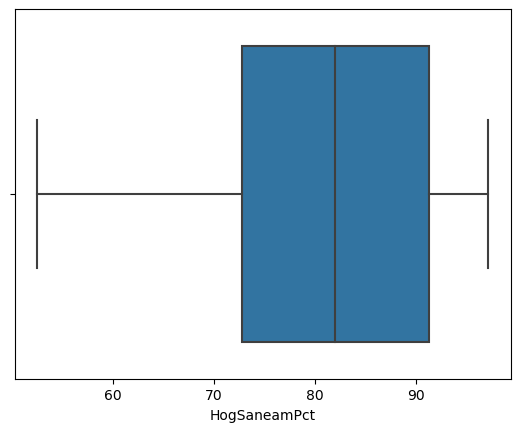

In [48]:
#graficos de diagrama de caja de las columnas 
sea.boxplot(dataDisMap['HogSaneamPct'])

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='PobPobrezaPct'>

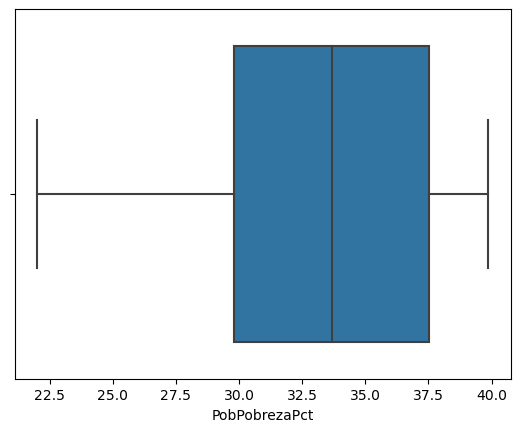

In [44]:
sea.boxplot(dataDisMap['PobPobrezaPct'])

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='VivConLuzPct'>

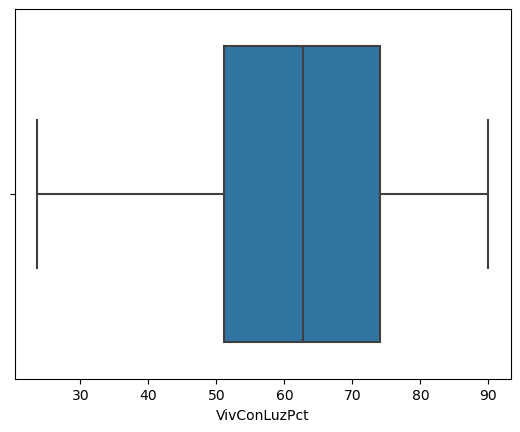

In [45]:
sea.boxplot(dataDisMap['VivConLuzPct'])

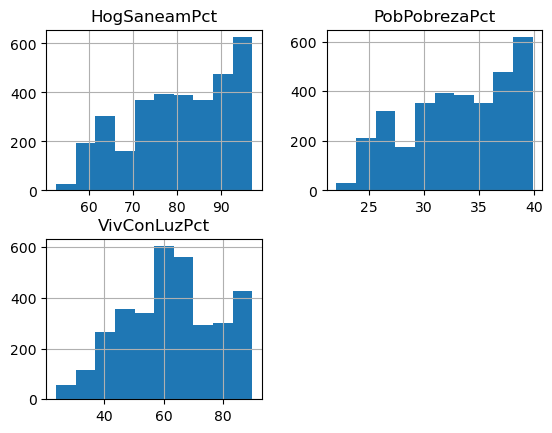

In [50]:
#histograma de los indicadores
dataDisMap[selecIndi].hist();

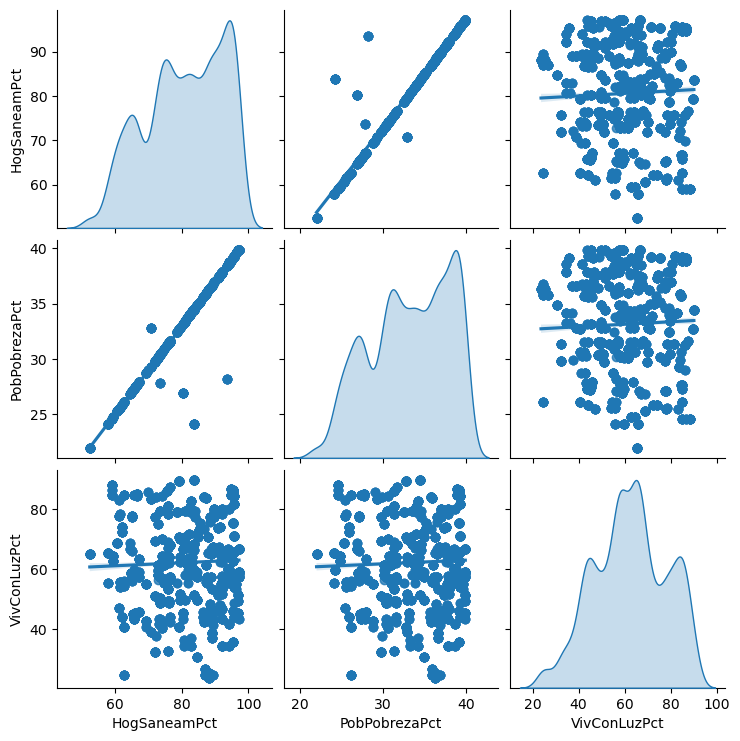

In [51]:
#gráfico de pares de los indicadores 
sea.pairplot(dataDisMap[selecIndi], kind="reg", diag_kind="kde")

In [52]:
columnasEscala = selecIndi

from sklearn.preprocessing import robust_scale as rs
from sklearn.preprocessing import power_transform as pt
from sklearn.preprocessing import quantile_transform as qt

rs_result = rs(dataDisMap[columnasEscala])
pt_result = pt(dataDisMap[columnasEscala])
qt_result = qt(dataDisMap[columnasEscala])

<AxesSubplot:>

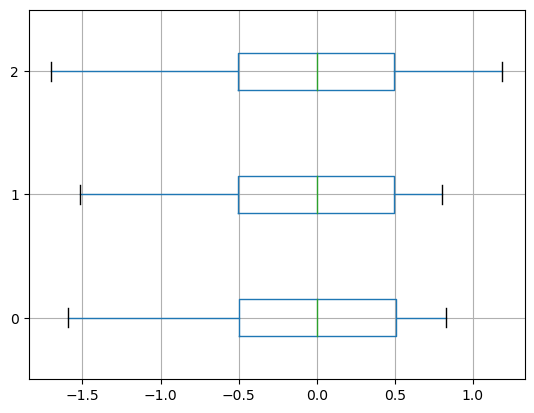

In [53]:
# observo 
#"rs_result"
pd.DataFrame(rs_result).boxplot(vert=False)

<AxesSubplot:>

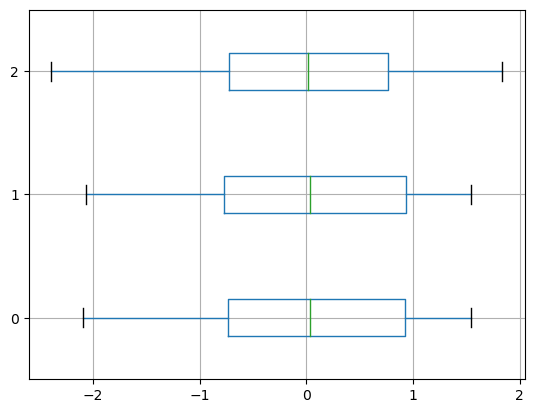

In [54]:
#"pt_result"
pd.DataFrame(pt_result).boxplot(vert=False)

<AxesSubplot:>

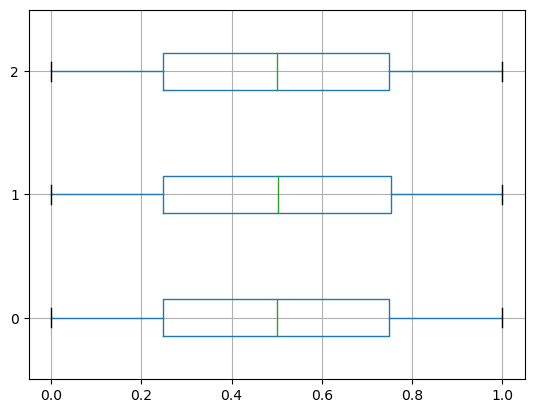

In [55]:
#"qt_result"
pd.DataFrame(qt_result).boxplot(vert=False)

In [57]:
# rename
selecIndi_t = [s+'_t' for s in selecIndi ]

# añado columnas
dataDisMap[selecIndi_t] = qt_result

In [61]:
import matplotlib.pyplot as plt

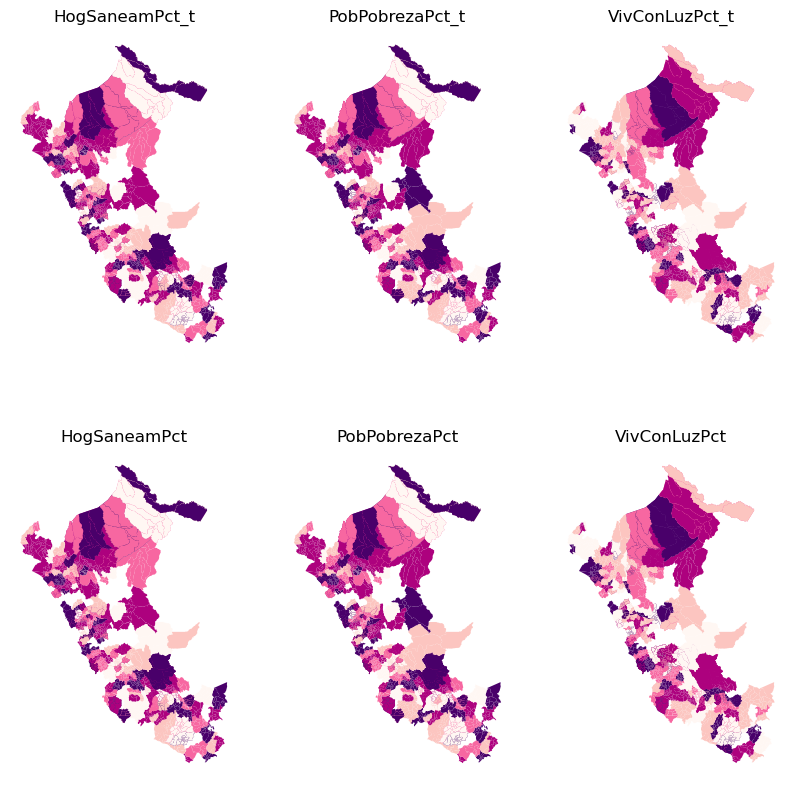

In [63]:
f, axs = plt.subplots( ncols=3, nrows=2,figsize=(10, 10))
axs = axs.flatten()

# Iniciamos un ciclo iterativo sobre nuestros 3 indicadores seleccionados
for i, col in enumerate(selecIndi_t + selecIndi):
    
    # select the axis where the map will go
    ax = axs[i]
    
    # Plot the map
    dataDisMap.plot(column=col,
                    ax=ax,
                    scheme="Quantiles",
                    linewidth=0,
                    cmap="RdPu",)
    
    # Remove axis clutter
    ax.set_axis_off()
    
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
    
plt.show()

In [65]:
# actualizo geopackage "dataMapsPeru"
#dataDisMap.to_file(os.path.join('maps',"dataMapsPeru.gpkg"), layer='distritos', driver="GPKG")

In [66]:
#EJERCICIO 4

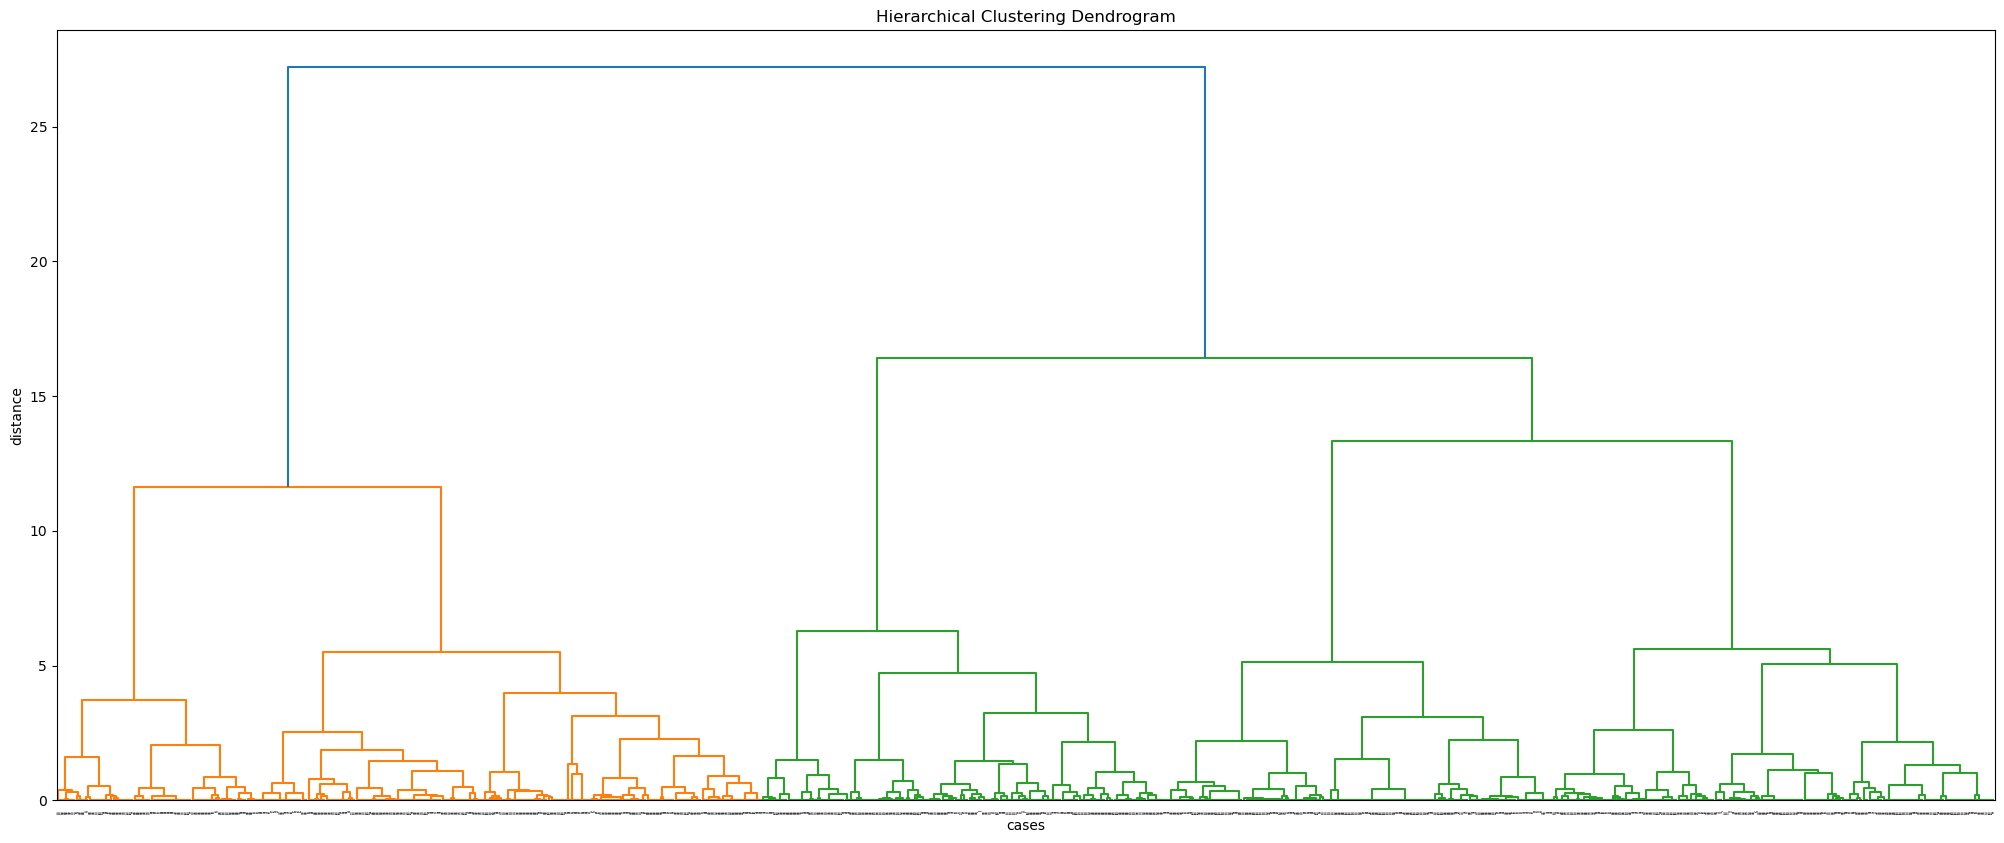

In [67]:
from scipy.cluster import hierarchy as hc

Z = hc.linkage(qt_result, 'ward')

# calculamos el dendrograma completo:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram') # Dendograma de agrupamiento jerárquico
plt.xlabel('cases')
plt.ylabel('distance')

hc.dendrogram(Z, leaf_rotation=90., leaf_font_size=1,)

plt.show()

In [69]:
import numpy as np 

In [70]:
from sklearn.cluster import AgglomerativeClustering as agnes

# para asegurarnos que los resultados sean consistentes:
np.random.seed(12345)

# inicializamos el algoritmo, solicitando 3 clústeres
model = agnes(linkage="ward", n_clusters=3).fit(dataDisMap[selecIndi_t])

# asignamos etiquetas a la tabla de datos principal
dataDisMap["hc_3"] = model.labels_

In [71]:
dataDisMap["hc_3"].value_counts()

0    1408
1    1204
2     697
Name: hc_3, dtype: int64

In [72]:
dataDisMap.groupby("hc_3")[selecIndi].mean()

,HogSaneamPct,PobPobrezaPct,VivConLuzPct
hc_3,,,
0,86.782820,35.713128,73.465562
1,68.258987,28.027007,58.237161
2,89.751664,36.900666,46.277806


In [73]:
dataDisMap_long = dataDisMap.set_index("hc_3").copy()

#mantener unicamente variables usadas en la agrupación
dataDisMap_long = dataDisMap_long[selecIndi]

#versión "long" del conjunto de datos
dataDisMap_long = dataDisMap_long.stack()

#índices a columnas ok
dataDisMap_long = dataDisMap_long.reset_index()

dataDisMap_long = dataDisMap_long.rename(columns={"level_1": "Attribute", 0: "Values"})

dataDisMap_long.head()

,hc_3,Attribute,Values
0,0,HogSaneamPct,88.550
1,0,PobPobrezaPct,36.420
2,0,VivConLuzPct,75.645
3,0,HogSaneamPct,88.550
4,0,PobPobrezaPct,36.420


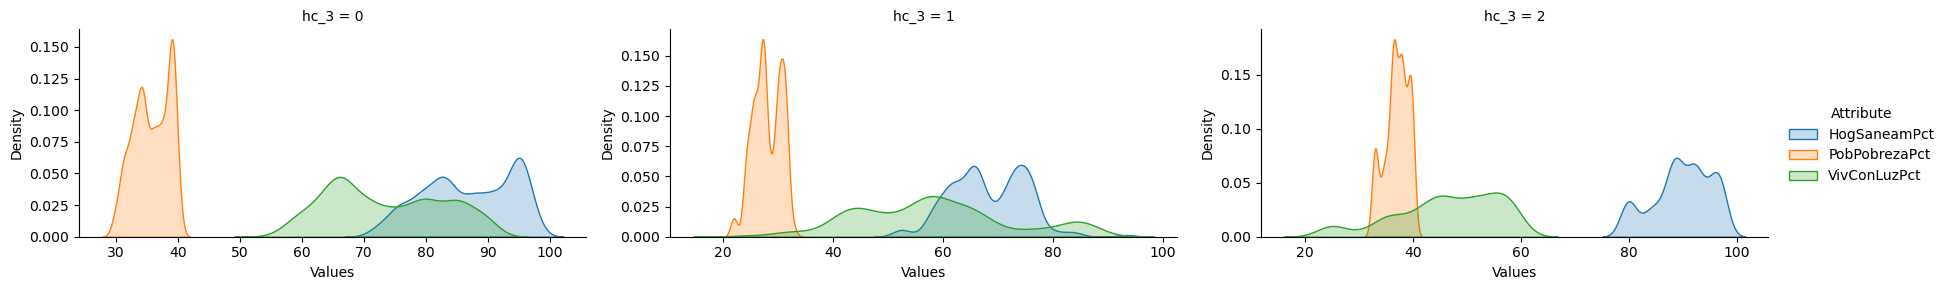

In [74]:
#conf. facetas
facets = sea.FacetGrid(
         data=dataDisMap_long,
         col="hc_3",
         hue="Attribute",
         sharey=False,
         sharex=False,
         aspect=2,
         col_wrap=3,)

# construyo el plot como un "sns.kdeplot"
facets.map(sea.kdeplot, "Values", fill=True).add_legend()

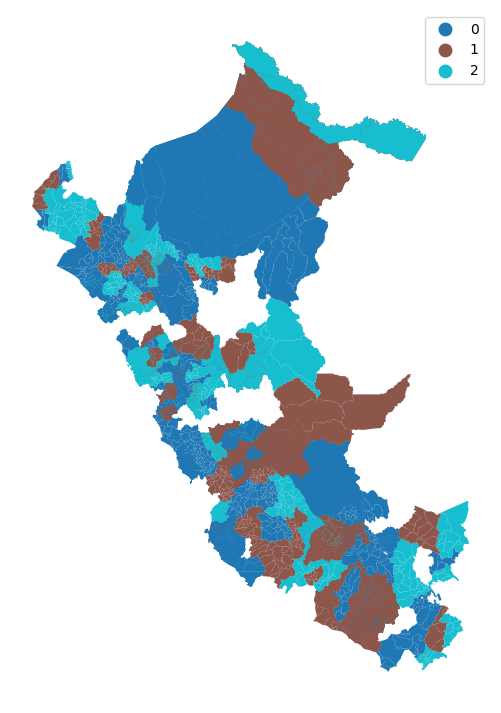

In [75]:
f, ax = plt.subplots(1, figsize=(9, 9))

dataDisMap.plot(column="hc_3", categorical=True, legend=True, linewidth=0, ax=ax)

ax.set_axis_off()

plt.show()

In [76]:
#EJERCICIO 5 

In [77]:
from libpysal.weights import Queen, Rook, KNN

# rook
w_rook = Rook.from_dataframe(dataDisMap)

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 203.
  warnings.warn(message)


In [78]:
w_queen = Queen.from_dataframe(dataDisMap)

In [79]:
# "k" vecinos más cercanos
w_knn = KNN.from_dataframe(dataDisMap, k=4)

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 95 disconnected components.
  warnings.warn(message)


In [80]:
dataDisMap.head(1)

,DEPARTAMENTO,PROVINCIA,DISTRITO,geometry,DepartProv,Ubigeo,Poblacion,Superficie,HogSaneamPct,PobPobrezaPct,VivConLuzPct,ICP 2018,HogSaneamPct_t,PobPobrezaPct_t,VivConLuzPct_t,hc_3
0,MOQUEGUA,ILO,ILO,"POLYGON ((-71.33934 -17.62215, -71.33907 -17.6...",MOQUEGUA+ILO,180303,3319,"338,08",88.55,36.42,75.645,0.150013,0.68018,0.682683,0.779835,0


In [81]:
#numero de vecinos de la prov  
w_rook.neighbors[0]

[1, 2]

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

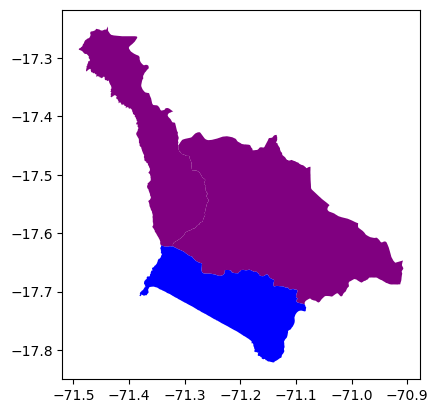

In [84]:
# 1º vecindario
base = dataDisMap[dataDisMap.PROVINCIA=="TACNA"].plot(facecolor="white",edgecolor='black', linewidth=0.5)

dataDisMap.iloc[w_rook.neighbors[0] ,].plot(ax=base,facecolor="purple")
dataDisMap.head(1).plot(ax=base,facecolor="blue")

In [85]:
w_queen.neighbors[0]

[1, 2]

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

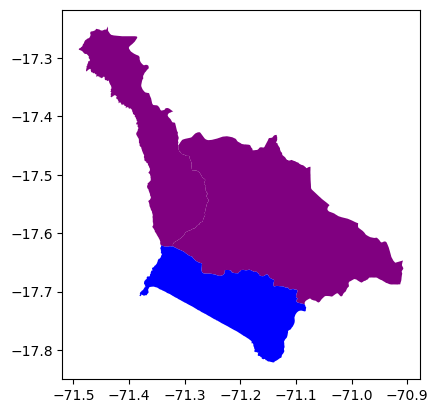

In [86]:
# 2º vecindario:
base = dataDisMap[dataDisMap.PROVINCIA=="TACNA"].plot(facecolor="white",edgecolor='black', linewidth=0.5)

dataDisMap.iloc[w_queen.neighbors[0] ,].plot(ax=base,facecolor="purple")
dataDisMap.head(1).plot(ax=base,facecolor="blue")

In [87]:
w_knn.neighbors[0]

[1, 2, 19, 24]

/Users/valeriaminano/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

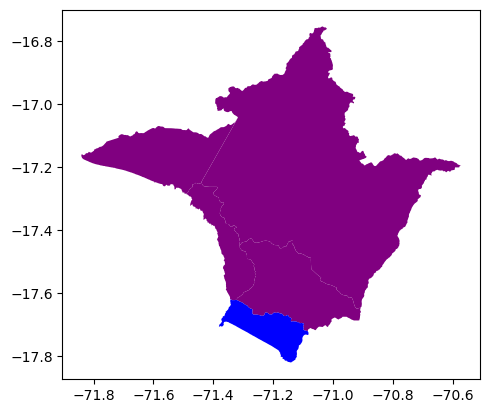

In [88]:
# 3º vecindario:
base=dataDisMap[dataDisMap.PROVINCIA=="TACNA"].plot(facecolor="white",edgecolor='black', linewidth=0.5)

dataDisMap.iloc[w_knn.neighbors[0],].plot(ax=base,facecolor="purple")
dataDisMap.head(1).plot(ax=base,facecolor="blue")

In [89]:
# con todos los vecinos por filas
w_knn.neighbors

{0: [1, 2, 19, 24],
 1: [0, 2, 19, 17],
 2: [1, 0, 23, 24],
 3: [4, 6, 5, 7],
 4: [3, 5, 6, 7],
 5: [4, 9, 3, 7],
 6: [7, 3, 11, 12],
 7: [12, 6, 11, 13],
 8: [9, 5, 35, 10],
 9: [10, 5, 7, 8],
 10: [9, 7, 12, 16],
 11: [13, 12, 6, 7],
 12: [13, 11, 7, 14],
 13: [12, 11, 14, 15],
 14: [15, 13, 12, 16],
 15: [14, 13, 16, 12],
 16: [14, 15, 10, 13],
 17: [18, 19, 15, 20],
 18: [17, 20, 21, 15],
 19: [17, 2, 1, 18],
 20: [21, 18, 22, 17],
 21: [20, 22, 18, 17],
 22: [21, 20, 16, 15],
 23: [24, 30, 29, 26],
 24: [23, 30, 29, 26],
 25: [26, 28, 27, 33],
 26: [25, 28, 27, 33],
 27: [28, 26, 25, 33],
 28: [27, 26, 25, 33],
 29: [30, 23, 24, 26],
 30: [29, 23, 24, 26],
 31: [32, 33, 34, 100],
 32: [31, 33, 34, 100],
 33: [34, 28, 27, 25],
 34: [33, 28, 27, 25],
 35: [8, 40, 36, 9],
 36: [35, 37, 40, 10],
 37: [43, 46, 39, 36],
 38: [39, 46, 45, 200],
 39: [46, 38, 198, 200],
 40: [41, 35, 43, 36],
 41: [43, 42, 44, 40],
 42: [44, 41, 43, 45],
 43: [41, 37, 44, 45],
 44: [42, 45, 41, 43],
 45: 

In [90]:
# matriz de barrio
# 1 = ambos son vecinos

pd.DataFrame(*w_knn.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,3299,3300,3301,3302,3303,3304,3305,3306,3307,3308
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [91]:
#contador ceros
w_knn.nonzero

13236

In [92]:
# % barrio - densidad
w_knn.pct_nonzero

0.12088244182532487

In [93]:
# provincia sin vecino
w_knn.islands

[]

In [94]:
#EJERCICIO 6 

In [95]:
#must para correlación espacial
w_knn.transform = 'R'

In [96]:
from esda.moran import Moran

# calculo del coeficiente de Moran para el indicador: HogSaneamPct
moranICP = Moran(dataDisMap['HogSaneamPct'], w_knn)
moranICP.I,moranICP.p_sim

(0.5051299534914787, 0.001)

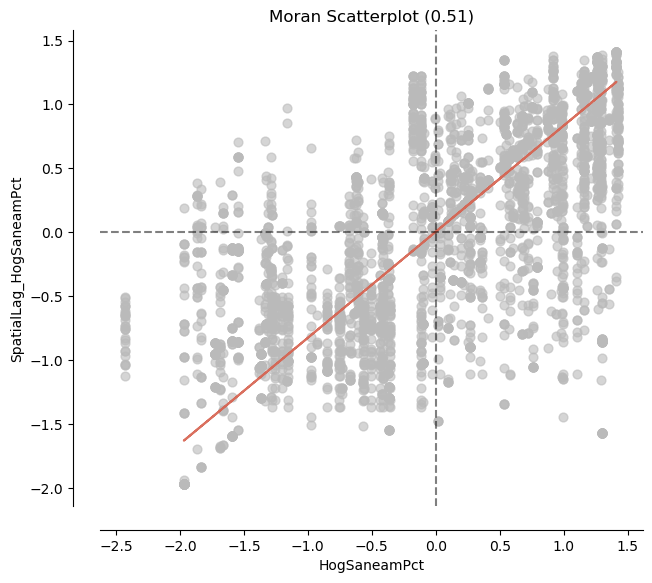

In [105]:
from splot.esda import moran_scatterplot

# diagrama de dispersión para 'HogSaneamPct'
fig, ax = moran_scatterplot(moranICP, aspect_equal=True)
ax.set_xlabel('HogSaneamPct')
ax.set_ylabel('SpatialLag_HogSaneamPct')
plt.show()

In [98]:
# coeficiente de Moran para 'VivConLuzPct'
moranESI = Moran(dataDisMap['VivConLuzPct'], w_knn)
moranESI.I,moranESI.p_sim

(0.3829204323557478, 0.001)

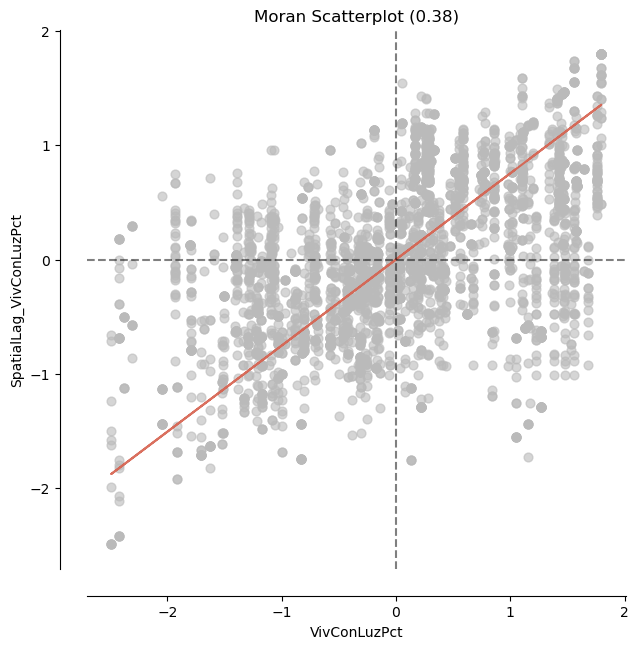

In [99]:
# diagrama de dispersión para VivConLuzPct
fig, ax = moran_scatterplot(moranESI, aspect_equal=True)
ax.set_xlabel('VivConLuzPct')
ax.set_ylabel('SpatialLag_VivConLuzPct')
plt.show()

In [101]:
# coeficiente de Moran para 'PobPobrezaPct'
moranPA = Moran(dataDisMap['PobPobrezaPct'], w_knn)
moranPA.I,moranPA.p_sim

(0.5160852299094925, 0.001)

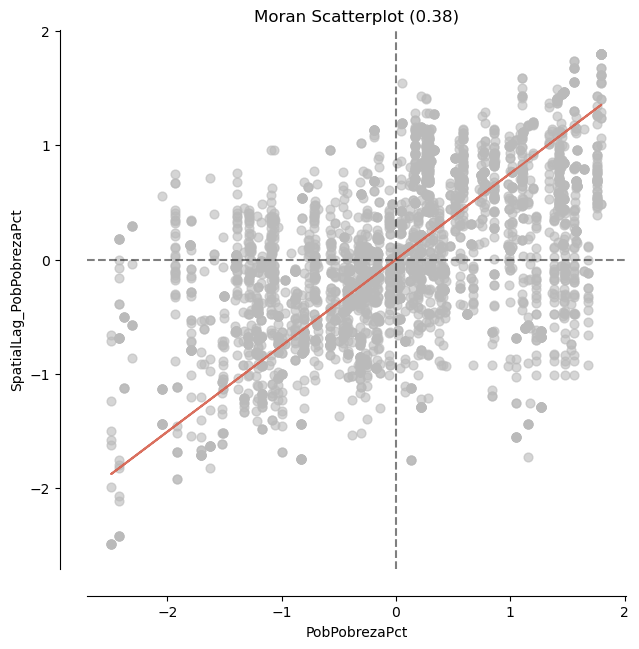

In [102]:
# diagrama de dispersión para PobPobrezaPct
fig, ax = moran_scatterplot(moranESI, aspect_equal=True)
ax.set_xlabel('PobPobrezaPct')
ax.set_ylabel('SpatialLag_PobPobrezaPct')
plt.show()

In [103]:
#EJERCICIO 7

In [104]:
# el diagrama de dispersión con información local:
from esda.moran import Moran_Local

# observamos las correlaciones espaciales de nuestros indicadores

# me quedo con el indicador "HogSaneamPct"

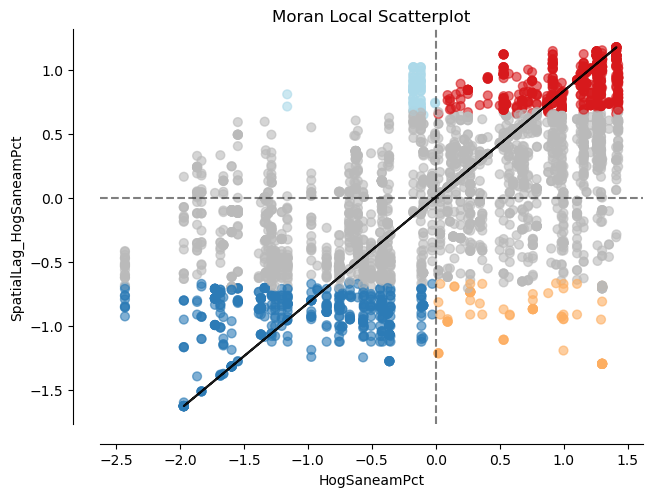

In [113]:
# calculo el "Moran_Local" de nuestro indicador con correlación espacial mayor "HogSaneamPct" y trazamos:
lisaHSP = Moran_Local(y=dataDisMap['HogSaneamPct'], w=w_knn, seed=2022)
fig, ax = moran_scatterplot(lisaHSP, p=0.05)

# nombres de los ejes:
ax.set_xlabel('HogSaneamPct')
ax.set_ylabel('SpatialLag_HogSaneamPct')

plt.show()

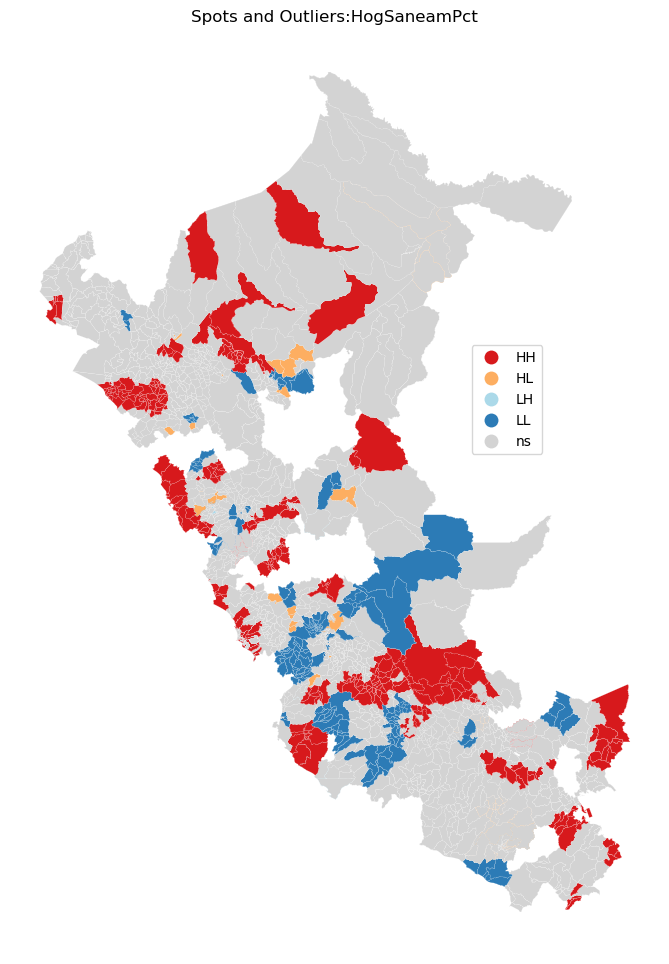

In [114]:
from splot.esda import lisa_cluster

#mapa con puntos y valores atípicos:
f, ax = plt.subplots(1, figsize=(12, 12))

plt.title('Spots and Outliers:HogSaneamPct')

fig = lisa_cluster(lisaHSP, dataDisMap, ax=ax, legend_kwds={'loc': 'center left', 'bbox_to_anchor': (0.7, 0.6)})
plt.show()

In [115]:
# cuadrante
lisaHSP.q

array([1, 1, 4, ..., 1, 1, 1])

In [116]:
# significancia
lisaHSP.p_sim

array([0.35 , 0.172, 0.346, ..., 0.005, 0.006, 0.15 ])

In [117]:
# cuadrante: 1 HH,  2 LH,  3 LL,  4 HL
pd.Series(lisaHSP.q).value_counts()

1    1335
3    1231
4     399
2     344
dtype: int64

In [118]:
dataDisMap['HogSaneamPct_quadrant'] = [l if p <0.05 else 0 for l,p in zip(lisaHSP.q, lisaHSP.p_sim)]
dataDisMap['HogSaneamPct_quadrant'].value_counts()

0    2122
1     552
3     497
4      69
2      69
Name: HogSaneamPct_quadrant, dtype: int64

In [120]:
# creo una lista que clasifica los patrones espaciales hallados con el "Moran_Local" analysis 
labels = ['0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

dataDisMap['HogSaneamPct_quadrant_names'] = [labels[i] for i in dataDisMap['HogSaneamPct_quadrant']]
dataDisMap['HogSaneamPct_quadrant_names'].value_counts()

0 no_sig         2122
1 hotSpot         552
3 coldSpot        497
4 hotOutlier       69
2 coldOutlier      69
Name: HogSaneamPct_quadrant_names, dtype: int64

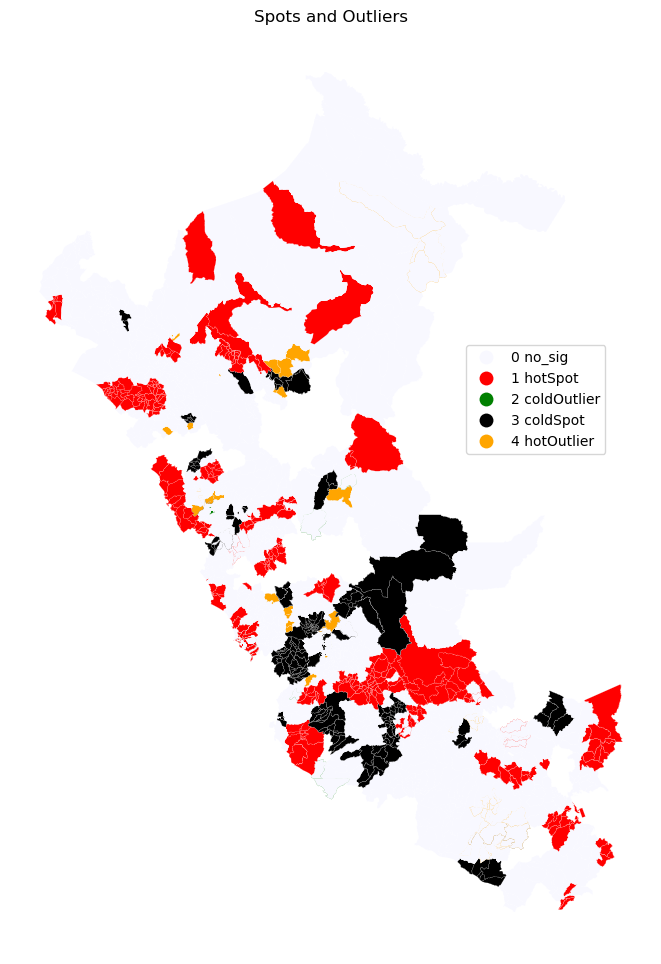

In [121]:
from matplotlib import colors

myColorMap = colors.ListedColormap(['ghostwhite', 'red', 'green', 'black','orange'])

f, ax = plt.subplots(1, figsize=(12,12))

plt.title('Spots and Outliers')

dataDisMap.plot(column='HogSaneamPct_quadrant_names', 
                      categorical=True,
                      cmap=myColorMap,
                      linewidth=0.1, 
                      edgecolor='white',
                      legend=True,
                      legend_kwds={'loc': 'center left', 'bbox_to_anchor': (0.7, 0.6)},
                      ax=ax)

ax.set_axis_off()

# muestro
plt.show()

In [ ]:
# actualización al geopackage
#dataDisMap.to_file(os.path.join('maps',"dataMapasPeru.gpkg"), layer='distritos', driver="GPKG")